In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# target function f
f = lambda x : -2*x + 3

l = -50   # low limit
h = 0     # high limit

# setting axis range for the target function f
x_axis, y_axis = [l, h], [f(l), f(h)]


def plot_target_function():
    plt.plot(x_axis, y_axis, color = 'black', label = 'target function')


def data_generation(data_size):
    np.random.seed(100)

    # x: input vector
    # y: output vector
    x1 = np.random.uniform(low = l, high = h, size=data_size)
    x2 = np.random.uniform(low = f(h), high = f(l), size=data_size)
    y = np.zeros(data_size)

    for i, (point_x1, point_x2) in enumerate(zip(x1, x2)):
        if point_x2 < f(point_x1):
            plt.scatter(point_x1, point_x2, color = 'b', marker = 'o')
            y[i] = -1
        elif point_x2 > f(point_x1):
            plt.scatter(point_x1, point_x2, color = 'r', marker = 'x')
            y[i] = +1
        else:
            plt.scatter(point_x1, point_x2, color = 'black')
            
    return x1, x2, y
            

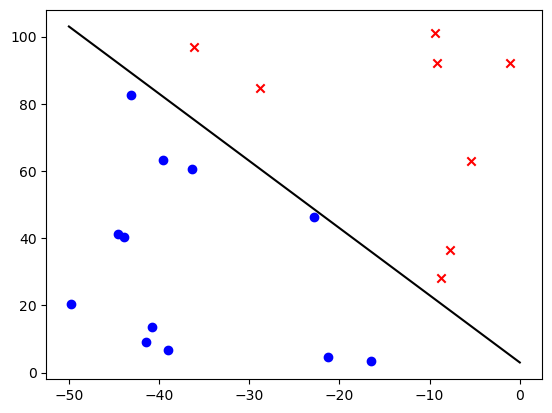

In [4]:
# target function and a data set of size 20
plot_target_function()
x1, x2, y = data_generation(20)

In [5]:
def perceptron_learning_algorithm(data_size, x1, x2, y):
    # initial parameters
    w = [0, 0, 0]
    update_no = 0
    
    while True:
        misclassified = False
        for i in range(data_size):
            x = np.array([1, x1[i], x2[i]])
            if y[i]*(np.dot(w, x)) <= 0:
                w = w + y[i]*x
                misclassified = True
                break
            
        if misclassified == False:
            break
        
        update_no+=1
        
    
    g = lambda x : -w[1]*x/w[2] - w[0]/w[2]
    y_learned_axis = [g(l), g(h)]
    
    # plotting the predicted target function
    plt.plot(x_axis, y_learned_axis, color = 'green', label = 'learned function')
    print(f"Number of updates that the algorithm takes before converging: {update_no}")

Number of updates that the algorithm takes before converging: 3


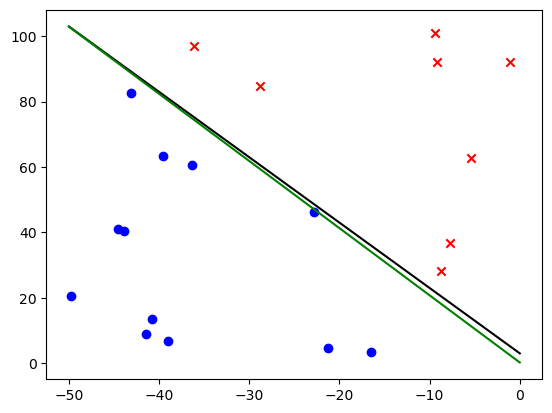

In [6]:
# perceptron learning algorithm with a data set of size 20
plot_target_function()
x1, x2, y = data_generation(20)
perceptron_learning_algorithm(20, x1, x2, y)

Number of updates that the algorithm takes before converging: 19173


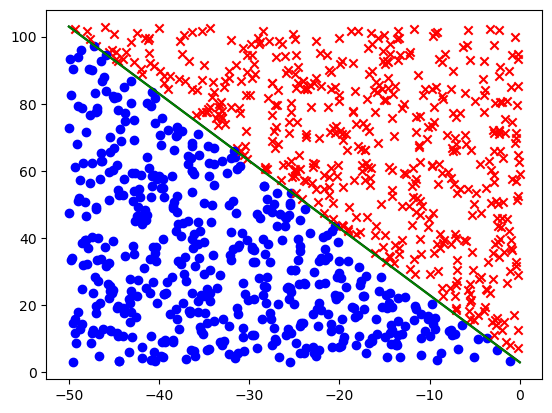

In [7]:
# perceptron learning algorithm with a data set of size 1000
plot_target_function()
x1, x2, y = data_generation(1000)
perceptron_learning_algorithm(1000, x1, x2, y)